In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cab = pd.read_csv('DataSets/Cab_Data.csv')
customer = pd.read_csv('DataSets/Customer_ID.csv')
transaction = pd.read_csv('DataSets/Transaction_ID.csv')
city = pd.read_csv('DataSets/City.csv')

#### Cab_Data Summary

In [3]:
print("<Cab_Data>")
print(cab.shape)
print(cab.info())
print(cab.isnull().sum()) 

<Cab_Data>
(359392, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64


In [4]:
print('Date of Travel range:', cab['Date of Travel'].min(), ' to ' , cab['Date of Travel'].max())
print('Number of Days in Date of Travel column:', len(cab['Date of Travel'].unique()))
# 1095 days is 365*3. The range of date should be either '31/01/2016'-'31/01/2019' or '01/01/2016'-'31/12/2018'.
# I chose '01/01/2016'-'31/12/2018'.

Date of Travel range: 42371  to  43465
Number of Days in Date of Travel column: 1095


In [5]:
sorted_dates = pd.DataFrame()
sorted_dates['Date of Travel'] = sorted(cab['Date of Travel'].unique())
sorted_dates['date'] = pd.date_range(start = '01/01/2016', periods = len(cab['Date of Travel'].unique()), freq = 'D')

cab_1 = pd.DataFrame.merge(cab,sorted_dates,on="Date of Travel")

In [6]:
cab_1 = cab_1.sort_values("Transaction ID")
cab_1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,date
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07
111,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05
220,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01
401,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06
542,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02


In [7]:
print(cab['Transaction ID'].duplicated().sum()) # no duplicate transaction ID
print(cab['Company'].unique()) 
print('Number of Cities:', len(cab['City'].unique()))
print('KM Travelled range:', cab['KM Travelled'].min(), ' to ' , cab['KM Travelled'].max())
print('Price Charged range:', cab['Price Charged'].min(), ' to ' , cab['Price Charged'].max())
print('Cost of Trip range:', cab['Cost of Trip'].min(), ' to ' , cab['Cost of Trip'].max())
print('dates range:', cab_1['date'].min(), ' to ' , cab_1['date'].max())

0
['Pink Cab' 'Yellow Cab']
Number of Cities: 19
KM Travelled range: 1.9  to  48.0
Price Charged range: 15.6  to  2048.03
Cost of Trip range: 19.0  to  691.2
dates range: 2016-01-01 00:00:00  to  2018-12-30 00:00:00


#### Customer_ID Summary

In [8]:
print("<Customer_ID>")
print(customer.shape)
print(customer.info())
print(customer.isnull().sum()) 

<Customer_ID>
(49171, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


In [9]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
print(customer['Customer ID'].duplicated().sum()) # no duplicate customer ID
print('Gender:', customer['Gender'].unique())
print('Age range:', customer['Age'].min(), ' to ' , customer['Age'].max())
print('Income (USD/Month) range:', customer['Income (USD/Month)'].min(), ' to ' , customer['Income (USD/Month)'].max())

0
Gender: ['Male' 'Female']
Age range: 18  to  65
Income (USD/Month) range: 2000  to  35000


#### Transaction_ID Summary

In [11]:
print("<Transaction_ID>")
print(transaction.shape)
print(transaction.info())
print(transaction.isnull().sum()) 

<Transaction_ID>
(440098, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


In [12]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [13]:
print(transaction['Transaction ID'].duplicated().sum()) # no duplicate transaction ID
print(transaction['Customer ID'].duplicated().sum()) # one customers to many transactions
print('Payment_Mode:', transaction['Payment_Mode'].unique())

0
390927
Payment_Mode: ['Card' 'Cash']


#### City Summary

In [14]:
print("<City>")
print(city.shape)
print(city.info())
print(city.isnull().sum()) 

<City>
(20, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None
City          0
Population    0
Users         0
dtype: int64


In [15]:
city['Population'] = city['Population'].str.replace(',','')
city['Population']=city['Population'].astype(int)
city['Users'] = city['Users'].str.replace(',','')
city['Users']=city['Users'].astype(int)

In [16]:
city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [17]:
print(city['City'].duplicated().sum()) # no duplicate City

0


### Merge Data

In [18]:
print(cab_1.shape)
merged = pd.DataFrame.merge(cab_1,transaction,on="Transaction ID")
print(merged.shape)
merged = pd.DataFrame.merge(merged,customer,on="Customer ID")
print(merged.shape)
merged = pd.DataFrame.merge(merged,city,on="City")
print(merged.shape)
print(merged.head())

(359392, 8)
(359392, 10)
(359392, 13)
(359392, 15)
   Transaction ID  Date of Travel     Company        City  KM Travelled  \
0        10000011           42377    Pink Cab  ATLANTA GA         30.45   
1        10351127           43302  Yellow Cab  ATLANTA GA         26.19   
2        10412921           43427  Yellow Cab  ATLANTA GA         42.55   
3        10000012           42375    Pink Cab  ATLANTA GA         28.62   
4        10320494           43211  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip       date  Customer ID Payment_Mode Gender  \
0         370.95      313.6350 2016-01-07        29290         Card   Male   
1         598.70      317.4228 2018-07-20        29290         Cash   Male   
2         792.05      597.4020 2018-11-22        29290         Card   Male   
3         358.52      334.8540 2016-01-05        27703         Card   Male   
4         721.10      467.1192 2018-04-20        27703         Card   Male   

   Age  Income (USD/Month)  P

In [19]:
# Adding new columns 'profit' and 'month'
merged['profit'] = merged['Price Charged'] - merged['Cost of Trip']
merged['year'] = merged['date'].dt.year
merged['month'] = merged['date'].dt.month
merged['day'] = merged['date'].dt.day
merged['dates'] = pd.to_datetime(merged['date']).dt.to_period('M')
print(merged.head())

   Transaction ID  Date of Travel     Company        City  KM Travelled  \
0        10000011           42377    Pink Cab  ATLANTA GA         30.45   
1        10351127           43302  Yellow Cab  ATLANTA GA         26.19   
2        10412921           43427  Yellow Cab  ATLANTA GA         42.55   
3        10000012           42375    Pink Cab  ATLANTA GA         28.62   
4        10320494           43211  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip       date  Customer ID Payment_Mode Gender  \
0         370.95      313.6350 2016-01-07        29290         Card   Male   
1         598.70      317.4228 2018-07-20        29290         Cash   Male   
2         792.05      597.4020 2018-11-22        29290         Card   Male   
3         358.52      334.8540 2016-01-05        27703         Card   Male   
4         721.10      467.1192 2018-04-20        27703         Card   Male   

   Age  Income (USD/Month)  Population  Users    profit  year  month  day  \
0  

## Areas to investigate:
1. Which company has travelled further per trip?
2. Which company has travelled further per user
3. Which company has made more profit per trip?
4. Which company has made more profit per user?
5. How much portion of the customers are repeat customers for each company?
6. Which cities to focus on for each company?

#### Hypothesis 1
H0: Avg KM Travelled per Trip for each company are equal  
H0: Avg KM Travelled per Trip for each company are not equal

In [20]:
data1 = merged[merged['Company'] == 'Yellow Cab']['KM Travelled']
data2 = merged[merged['Company'] == 'Pink Cab']['KM Travelled']

from scipy import stats
stat, p = stats.ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Accept the null hypothesis')
else:
 print('Reject the null hyhothesis')

stat=0.200, p=0.842
Accept the null hypothesis


#### Hypothesis 2

H0: Avg KM Travelled per User for each company are equal  
H0: Avg KM Travelled per User for each company are not equal

In [21]:
data1 = merged[merged['Company'] == 'Yellow Cab'].groupby(['Customer ID'])['KM Travelled'].mean()
data2 = merged[merged['Company'] == 'Pink Cab'].groupby(['Customer ID'])['KM Travelled'].mean()

from scipy import stats
stat, p = stats.ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Accept the null hypothesis')
else:
 print('Reject the null hyhothesis')

stat=0.964, p=0.335
Accept the null hypothesis


#### Hypothesis 3

H0: Avg Profit per Trip for each company are equal  
H0: Avg Profit per Trip for each company are not equal

In [22]:
data1 = merged[merged['Company'] == 'Yellow Cab']['profit']
data2 = merged[merged['Company'] == 'Pink Cab']['profit']

from scipy import stats
stat, p = stats.ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Accept the null hypothesis')
else:
 print('Reject the null hyhothesis')

stat=160.372, p=0.000
Reject the null hyhothesis


#### Hypothesis 4

H0: Avg Profit per User for each company are equal  
H0: Avg Profit per User for each company are not equal

In [23]:
data1 = merged[merged['Company'] == 'Yellow Cab'].groupby(['Customer ID'])['profit'].mean()
data2 = merged[merged['Company'] == 'Pink Cab'].groupby(['Customer ID'])['profit'].mean()

from scipy import stats
stat, p = stats.ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Accept the null hypothesis')
else:
 print('Reject the null hyhothesis')

stat=106.544, p=0.000
Reject the null hyhothesis


In [24]:
import scipy.stats as stats
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
stats.mannwhitneyu(x=data1, y=data2, alternative = 'less')
# output
#MannwhitneyuResult(statistic=489.5, pvalue=7.004695394561267e-07)

MannwhitneyuResult(statistic=950700558.0, pvalue=1.0)

#### Hypothesis 5

H0: Avg Trip per User for each company are equal  
H0: Avg Trip per User for each company are not equal

In [25]:
data1 = merged[merged['Company'] == 'Yellow Cab'].groupby(['Customer ID'])['Transaction ID'].count()
data2 = merged[merged['Company'] == 'Pink Cab'].groupby(['Customer ID'])['Transaction ID'].count()

from scipy import stats
stat, p = stats.ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Accept the null hypothesis')
else:
 print('Reject the null hyhothesis')

stat=91.095, p=0.000
Reject the null hyhothesis


### Business Problem: to identify the right company to make investment (Yellow Cab vs Pink Cab)
#### KPIs to decide better investment opportunity: 
1. # of transaction
2. Avg # of users, Avg # of trips per user
3. Avg KM travelled per trip (Accepted Null Hypothesis)
4. Avg KM travelled per user (Accepted Null Hypothesis)
5. Avg $ Profit
6. Avg $ Profit per user
7. Avg # of repeat users

#### 1. Transaction

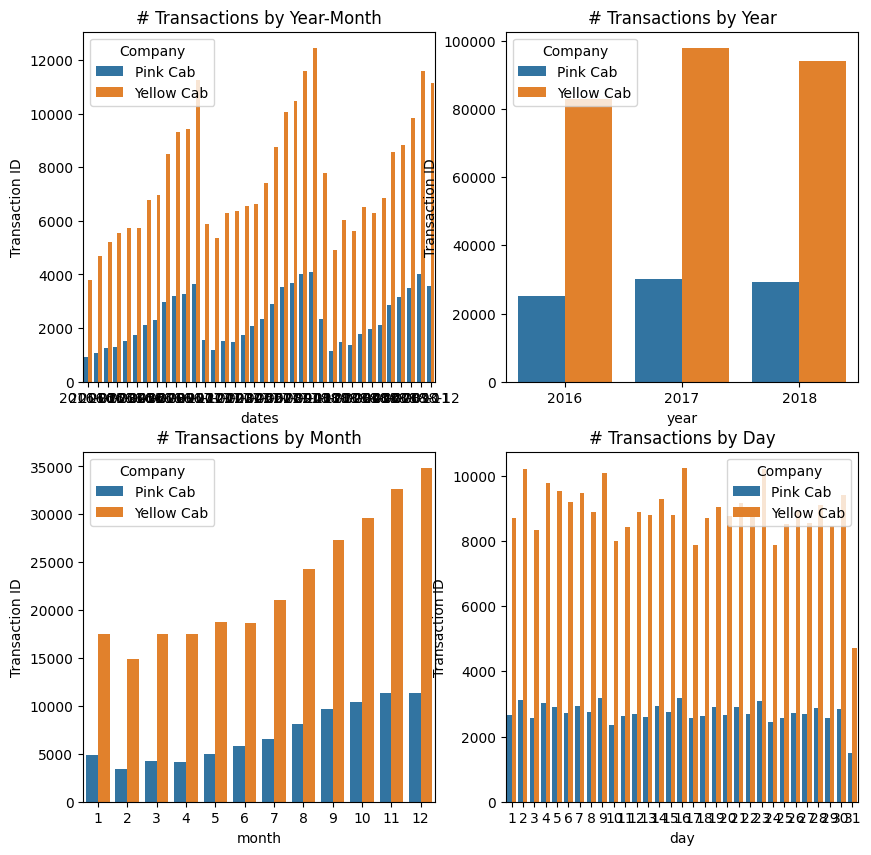

In [26]:
dates_transaction = merged.groupby(['dates', 'Company'])['Transaction ID'].count().reset_index()
y_transaction = merged.groupby(['year', 'Company'])['Transaction ID'].count().reset_index()
m_transaction = merged.groupby(['month', 'Company'])['Transaction ID'].count().reset_index()
d_transaction = merged.groupby(['day', 'Company'])['Transaction ID'].count().reset_index()

fig, axs = plt.subplots(nrows = 2, ncols=2, figsize=(10,10))
a = sns.barplot(data = dates_transaction,  x = 'dates' ,y = 'Transaction ID', hue = 'Company', errorbar = None, ax = axs[0,0])
b = sns.barplot(data = y_transaction,  x = 'year' ,y = 'Transaction ID', hue = 'Company', errorbar = None, ax = axs[0,1])
c = sns.barplot(data = m_transaction,  x = 'month' ,y = 'Transaction ID', hue = 'Company', errorbar = None, ax = axs[1,0])
d = sns.barplot(data = d_transaction,  x = 'day' ,y = 'Transaction ID', hue = 'Company', errorbar = None, ax = axs[1,1])

a.set_title('# Transactions by Year-Month')
b.set_title('# Transactions by Year')
c.set_title('# Transactions by Month')
d.set_title('# Transactions by Day')

plt.show()

#### 2. # of Unique Users

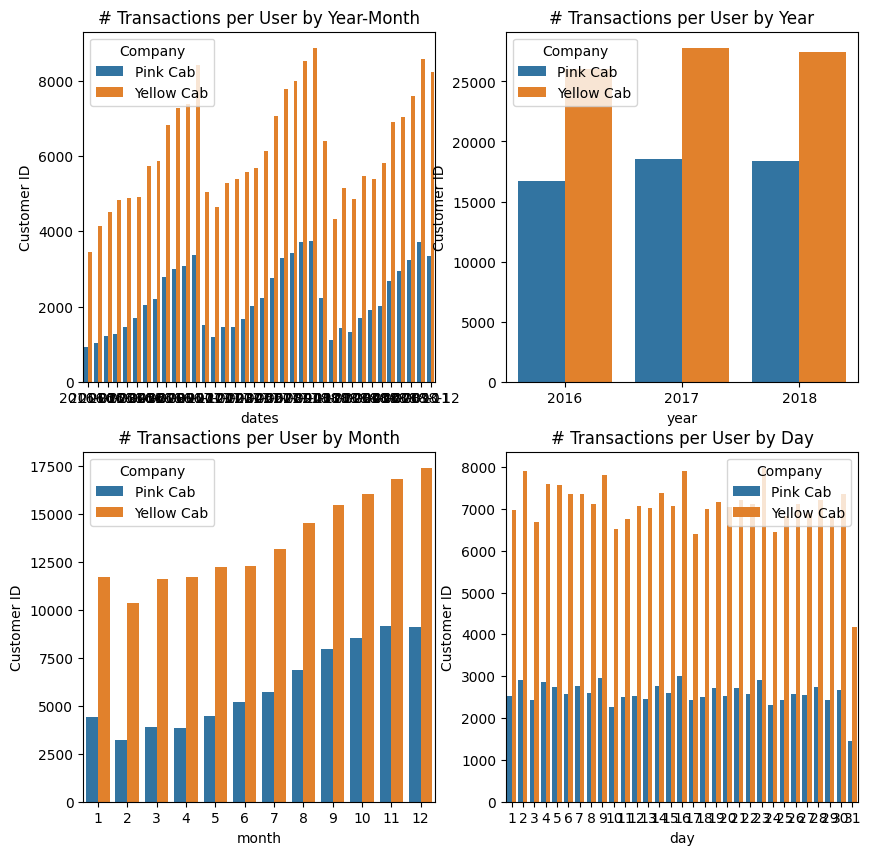

In [27]:
merged.groupby(['dates', 'Company'])['Customer ID'].nunique()

dates_user = merged.groupby(['dates', 'Company'])['Customer ID'].nunique().reset_index()
y_user = merged.groupby(['year', 'Company'])['Customer ID'].nunique().reset_index()
m_user = merged.groupby(['month', 'Company'])['Customer ID'].nunique().reset_index()
d_user = merged.groupby(['day', 'Company'])['Customer ID'].nunique().reset_index()

                                                            
fig, axs = plt.subplots(nrows = 2, ncols=2, figsize=(10,10))
a = sns.barplot(data = dates_user,  x = 'dates' ,y = 'Customer ID', hue = 'Company', errorbar = None, ax = axs[0,0])
b = sns.barplot(data = y_user,  x = 'year' ,y = 'Customer ID', hue = 'Company', errorbar = None, ax = axs[0,1])
c = sns.barplot(data = m_user,  x = 'month' ,y = 'Customer ID', hue = 'Company', errorbar = None, ax = axs[1,0])
d = sns.barplot(data = d_user,  x = 'day' ,y = 'Customer ID', hue = 'Company', errorbar = None, ax = axs[1,1])


a.set_title('# Transactions per User by Year-Month')
b.set_title('# Transactions per User by Year')
c.set_title('# Transactions per User by Month')
d.set_title('# Transactions per User by Day')

plt.show()
#Avg # of transaction and Avg # of tracnsactin per user increases as month increases. 
# Avg # transaction grows faster than Avg # transaction per user as month increases, which means lots of non-active or new users are engaged as it gets close to the end of year.

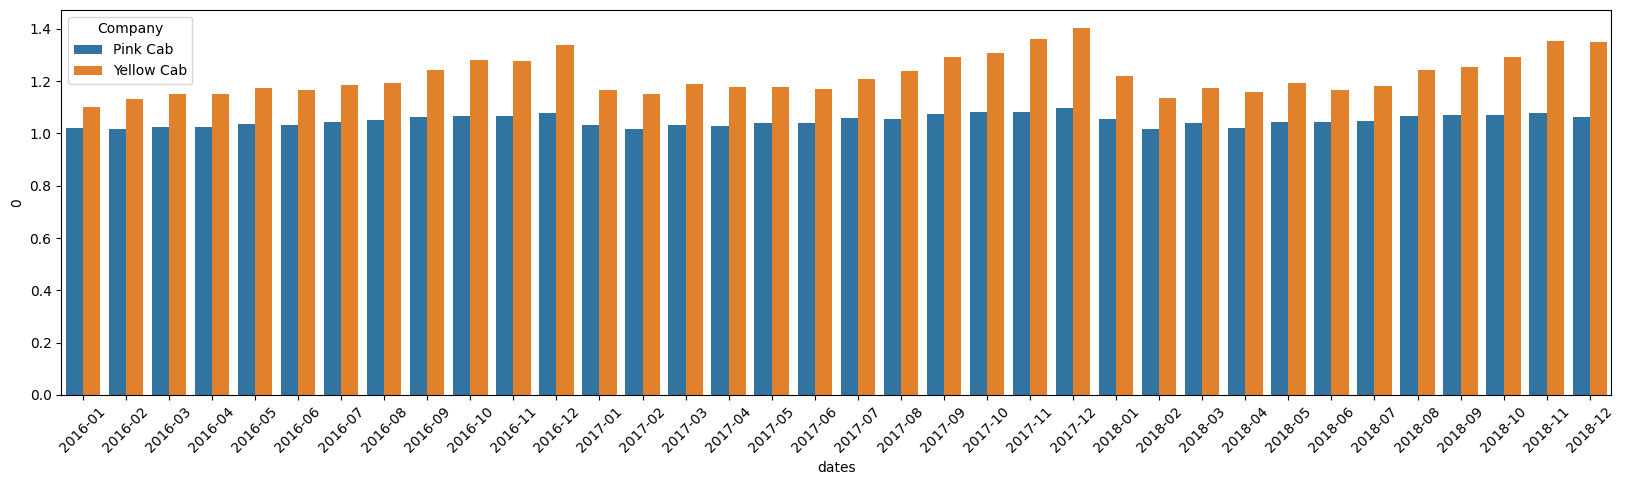

In [28]:
dates_user = merged.groupby(['dates', 'Company'])['Transaction ID'].count()/merged.groupby(['dates', 'Company'])['Customer ID'].nunique()
dates_user = dates_user.reset_index()
plt.figure(figsize=(20,5))
sns.barplot(data = dates_user,  x = 'dates' ,y = 0, hue = 'Company', errorbar = None)
plt.xticks(rotation=45)
plt.show()


#### 3. Avg Transactions per Users

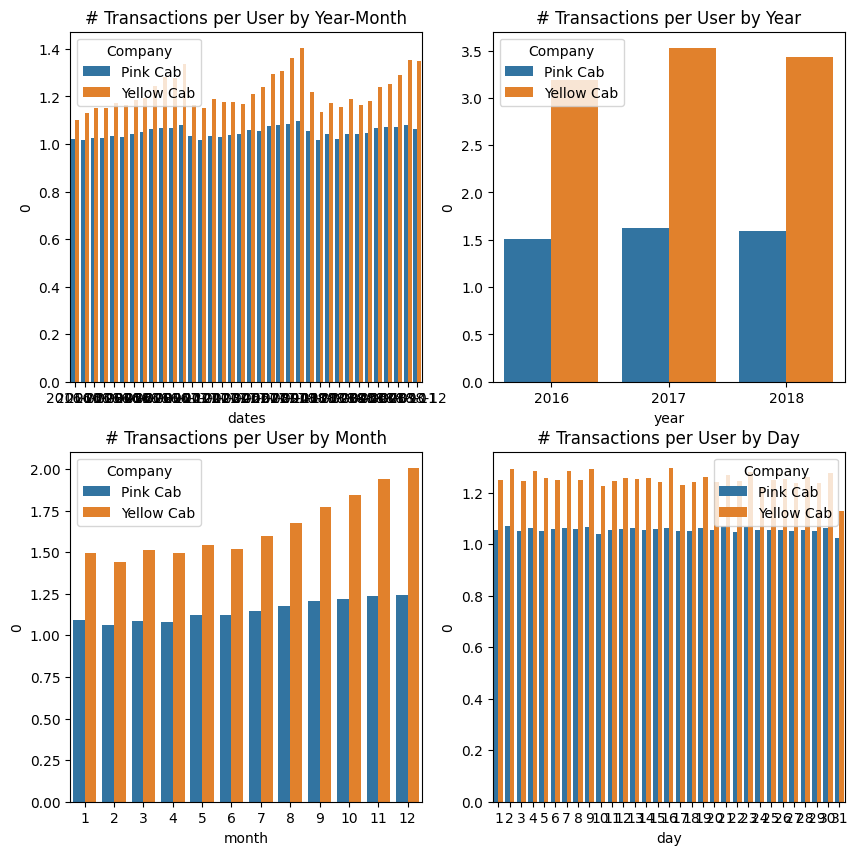

In [29]:
dates_user = merged.groupby(['dates', 'Company'])['Transaction ID'].count()/merged.groupby(['dates', 'Company'])['Customer ID'].nunique()
y_user = merged.groupby(['year', 'Company'])['Transaction ID'].count()/merged.groupby(['year', 'Company'])['Customer ID'].nunique()
m_user = merged.groupby(['month', 'Company'])['Transaction ID'].count()/merged.groupby(['month', 'Company'])['Customer ID'].nunique()
d_user = merged.groupby(['day', 'Company'])['Transaction ID'].count()/merged.groupby(['day', 'Company'])['Customer ID'].nunique()

dates_user = dates_user.reset_index()
y_user = y_user.reset_index()
m_user = m_user.reset_index()
d_user = d_user.reset_index()
                                                                                      
                                                                                      
fig, axs = plt.subplots(nrows = 2, ncols=2, figsize=(10,10))
a = sns.barplot(data = dates_user,  x = 'dates' ,y = 0, hue = 'Company', errorbar = None, ax = axs[0,0])
b = sns.barplot(data = y_user,  x = 'year' ,y = 0, hue = 'Company', errorbar = None, ax = axs[0,1])
c = sns.barplot(data = m_user,  x = 'month' ,y =0, hue = 'Company', errorbar = None, ax = axs[1,0])
d = sns.barplot(data = d_user,  x = 'day' ,y = 0, hue = 'Company', errorbar = None, ax = axs[1,1])


a.set_title('# Transactions per User by Year-Month')
b.set_title('# Transactions per User by Year')
c.set_title('# Transactions per User by Month')
d.set_title('# Transactions per User by Day')

plt.show()
#Avg # of transaction and Avg # of tracnsactin per user increases as month increases. 
# Avg # transaction grows faster than Avg # transaction per user as month increases, which means lots of non-active or new users are engaged as it gets close to the end of year.

#### 4. Total Profit

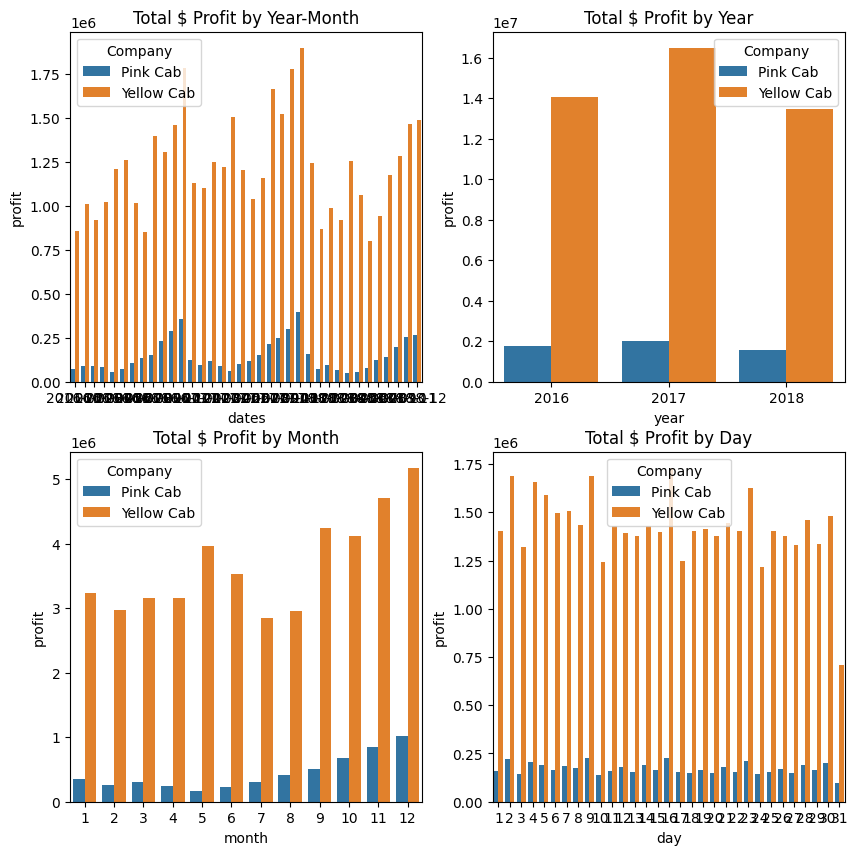

In [30]:
dates_profit = merged.groupby(['dates', 'Company'])['profit'].sum().reset_index()
y_profit = merged.groupby(['year', 'Company'])['profit'].sum().reset_index()
m_profit = merged.groupby(['month', 'Company'])['profit'].sum().reset_index()
d_profit = merged.groupby(['day', 'Company'])['profit'].sum().reset_index()

fig, axs = plt.subplots(nrows = 2, ncols=2, figsize=(10,10))
a = sns.barplot(data = dates_profit,  x = 'dates' ,y = 'profit', hue = 'Company', errorbar = None, ax = axs[0,0])
b = sns.barplot(data = y_profit,  x = 'year' ,y = 'profit', hue = 'Company', errorbar = None, ax = axs[0,1])
c = sns.barplot(data = m_profit,  x = 'month' ,y = 'profit', hue = 'Company', errorbar = None, ax = axs[1,0])
d = sns.barplot(data = d_profit,  x = 'day' ,y = 'profit', hue = 'Company', errorbar = None, ax = axs[1,1])

a.set_title('Total $ Profit by Year-Month')
b.set_title('Total $ Profit by Year')
c.set_title('Total $ Profit by Month')
d.set_title('Total $ Profit by Day')

plt.show()

#### 5. Avg Profit Per Transaction

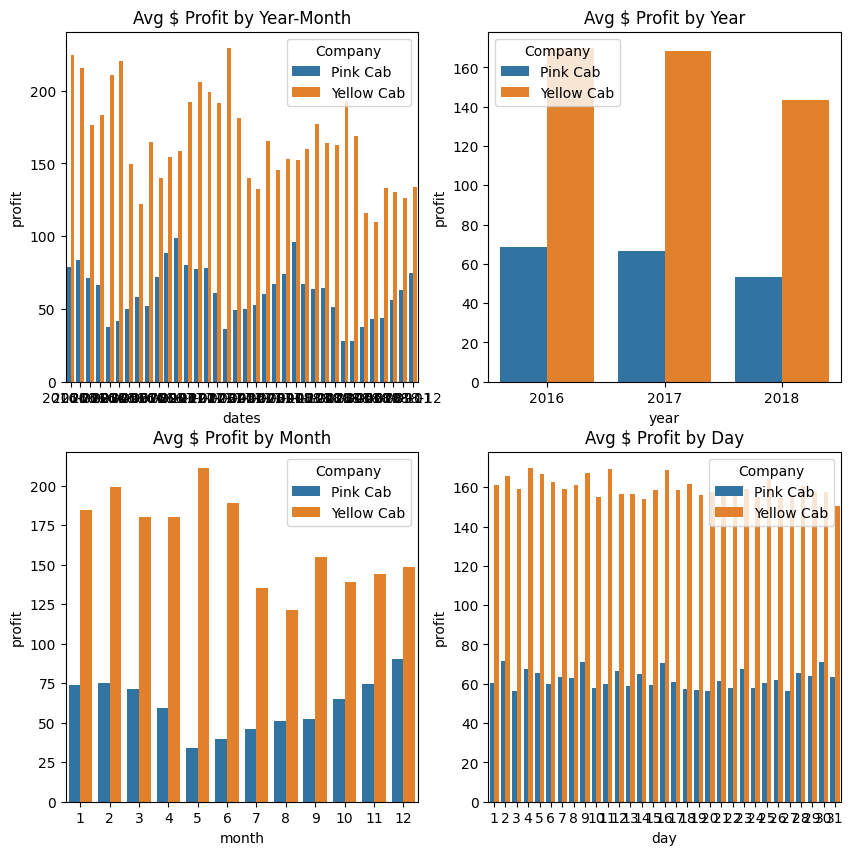

In [31]:
dates_profit = merged.groupby(['dates', 'Company'])['profit'].mean().reset_index()
y_profit = merged.groupby(['year', 'Company'])['profit'].mean().reset_index()
m_profit = merged.groupby(['month', 'Company'])['profit'].mean().reset_index()
d_profit = merged.groupby(['day', 'Company'])['profit'].mean().reset_index()

fig, axs = plt.subplots(nrows = 2, ncols=2, figsize=(10,10))
a = sns.barplot(data = dates_profit,  x = 'dates' ,y = 'profit', hue = 'Company', errorbar = None, ax = axs[0,0])
b = sns.barplot(data = y_profit,  x = 'year' ,y = 'profit', hue = 'Company', errorbar = None, ax = axs[0,1])
c = sns.barplot(data = m_profit,  x = 'month' ,y = 'profit', hue = 'Company', errorbar = None, ax = axs[1,0])
d = sns.barplot(data = d_profit,  x = 'day' ,y = 'profit', hue = 'Company', errorbar = None, ax = axs[1,1])

a.set_title('Avg $ Profit by Year-Month')
b.set_title('Avg $ Profit by Year')
c.set_title('Avg $ Profit by Month')
d.set_title('Avg $ Profit by Day')

plt.show()

#### 6. Avg Profit Per User

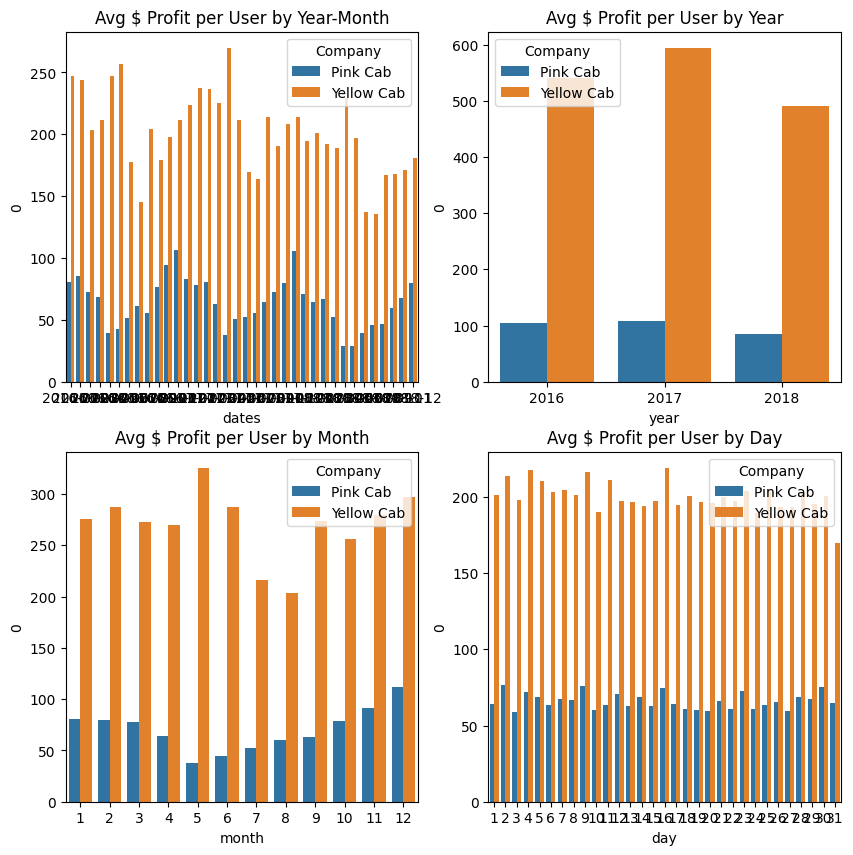

In [32]:
dates_profit_user = merged.groupby(['dates', 'Company'])['profit'].sum()/merged.groupby(['dates', 'Company'])['Customer ID'].nunique()
y_profit_user = merged.groupby(['year', 'Company'])['profit'].sum()/merged.groupby(['year', 'Company'])['Customer ID'].nunique()
m_profit_user = merged.groupby(['month', 'Company'])['profit'].sum()/merged.groupby(['month', 'Company'])['Customer ID'].nunique()
d_profit_user = merged.groupby(['day', 'Company'])['profit'].sum()/merged.groupby(['day', 'Company'])['Customer ID'].nunique()

dates_profit_user = dates_profit_user.reset_index()
y_profit_user = y_profit_user.reset_index()
m_profit_user = m_profit_user.reset_index()
d_profit_user = d_profit_user.reset_index()

fig, axs = plt.subplots(nrows = 2, ncols=2, figsize=(10,10))
a = sns.barplot(data = dates_profit_user,  x = 'dates' ,y = 0, hue = 'Company', errorbar = None, ax = axs[0,0])
b = sns.barplot(data = y_profit_user,  x = 'year' ,y = 0, hue = 'Company', errorbar = None, ax = axs[0,1])
c = sns.barplot(data = m_profit_user,  x = 'month' ,y = 0, hue = 'Company', errorbar = None, ax = axs[1,0])
d = sns.barplot(data = d_profit_user,  x = 'day' ,y = 0, hue = 'Company', errorbar = None, ax = axs[1,1])

a.set_title('Avg $ Profit per User by Year-Month')
b.set_title('Avg $ Profit per User by Year')
c.set_title('Avg $ Profit per User by Month')
d.set_title('Avg $ Profit per User by Day')

plt.show()

#### 7. Royal Users

In [33]:
royal_users = merged.groupby(['year', 'Company', 'Customer ID'])['Transaction ID'].count().reset_index()
royal_users[royal_users['Customer ID'] == 300]
royal_users_pivoted = royal_users.pivot(index = ['year', 'Customer ID'], columns = 'Company', values = 'Transaction ID').reset_index()
royal_users_pivoted.fillna(0)

Company,year,Customer ID,Pink Cab,Yellow Cab
0,2016,1,1.0,8.0
1,2016,2,2.0,11.0
2,2016,3,2.0,13.0
3,2016,4,0.0,9.0
4,2016,5,2.0,5.0
...,...,...,...,...
97517,2018,59996,0.0,3.0
97518,2018,59997,1.0,4.0
97519,2018,59998,2.0,2.0
97520,2018,59999,2.0,4.0


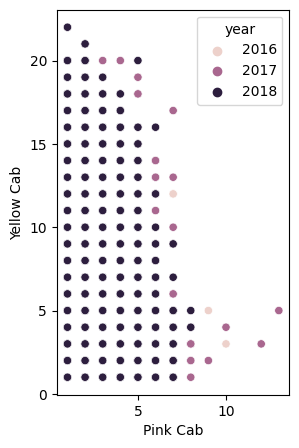

In [34]:
plt.figure(figsize=(3,5))
sns.scatterplot(data = royal_users_pivoted, x = 'Pink Cab' ,y = 'Yellow Cab', hue = 'year')
plt.show()

### Large portion of market share is already comosed by "Yellow Cab" Company, and the growth of "Pink Cab" company is not much greater than "Yellow Cab". Therefore, Inverstment to "Yellow Cab" company is highly recommend.

In [63]:
#a = merged[merged['Company'] == 'Yellow Cab'][['City', 'profit']]
#b = merged[merged['Company'] == 'Pink Cab'][['City', 'profit']]
#a.rename(columns = {'profit':'Yellow Cab'}, inplace = True)
#b.rename(columns = {'profit':'Pink Cab'}, inplace = True)

#c = pd.DataFrame.merge(a,b,on="City")

In [64]:
#plt.figure(figsize=(10, 6))
#city_1 = merged.pivot(index = 'city', columns = 'Company', values = 'profit').set_index()
#merged.plot(kind = 'bar', stacked = True)
#sns.barplot(data=merged, x="City", y="profit", hue="Company", errorbar = None).set_title('Profit by City')
#plt.show()

In [37]:
# ######
merged[merged.profit <0]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,date,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,profit,year,month,day,dates
39,10031719,42503,Pink Cab,ATLANTA GA,4.28,40.49,51.3600,2016-05-12,28533,Card,Male,39,28386,814885,24701,-10.8700,2016,5,12,2016-05
42,10347704,43293,Pink Cab,ATLANTA GA,2.36,24.83,25.0160,2018-07-11,29039,Cash,Male,35,17761,814885,24701,-0.1860,2018,7,11,2018-07
45,10266097,43065,Pink Cab,ATLANTA GA,25.52,283.26,293.4800,2017-11-25,28102,Cash,Male,39,14181,814885,24701,-10.2200,2017,11,25,2017-11
47,10319969,43207,Pink Cab,ATLANTA GA,11.10,108.44,120.9900,2018-04-16,29494,Card,Male,28,5644,814885,24701,-12.5500,2018,4,16,2018-04
59,10136342,42745,Pink Cab,ATLANTA GA,5.70,46.79,61.5600,2017-01-09,29599,Card,Male,27,12948,814885,24701,-14.7700,2017,1,9,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359299,10407212,43416,Yellow Cab,WASHINGTON DC,6.90,92.67,92.7360,2018-11-11,51880,Card,Female,59,22853,418859,127001,-0.0660,2018,11,11,2018-11
359310,10218074,42980,Yellow Cab,WASHINGTON DC,5.50,68.35,70.6200,2017-09-01,52158,Card,Female,59,19249,418859,127001,-2.2700,2017,9,1,2017-09
359354,10395329,43394,Yellow Cab,WASHINGTON DC,38.61,537.94,542.0844,2018-10-20,51257,Cash,Male,39,15247,418859,127001,-4.1444,2018,10,20,2018-10
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,2018-07-05,51406,Card,Female,29,6829,418859,127001,-5.8540,2018,7,5,2018-07


In [65]:
#merged.to_csv('merged.csv', index = False)